# Introduction to Digital Images

## 1. Images are just numerical arrays

A digital image is a multi-dimensional numerical array that is formed by pixels (voxels in 3D).

- Dimensions of an image : Width, heigth, depth, channels ('colors'), time
- Each pixel/voxel has brightness or intensity (black to white) represented by a number


#### Import packages and modules



In [1]:
import numpy as np                 # Array manipulation package
import matplotlib.pyplot as plt    # Plotting package
import skimage.io as io            # Image file manipulation module
%matplotlib inline

#### Read and diplay a 2D multicolor image

Image dimension:  (694, 786, 3)
Number of Channels:  3


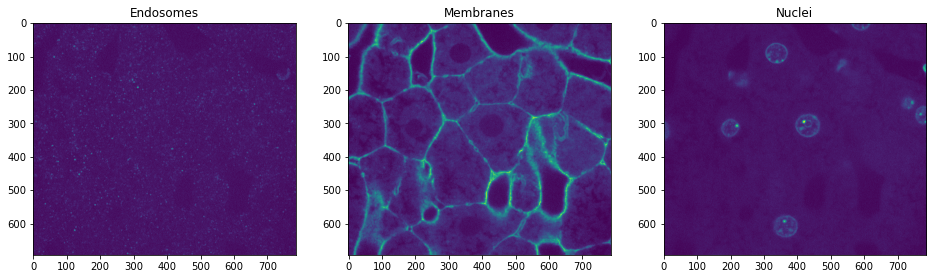

In [2]:
img = io.imread('2D_image_nuclei_cells_liver.tif')        # import image
print('Image dimension: ', img.shape)
print('Number of Channels: ', img.shape[2])
ChannelNames = ["Endosomes", "Membranes", "Nuclei"]  # list with channels' names

plt.figure(figsize=(16,8))

ch = 0
while ch < img.shape[2]:   
    plt.subplot(1,3,ch+1)
    plt.title(ChannelNames[ch])
    plt.imshow(img[:,:,ch])       # create image object and visualise
    ch = ch +1


Let's have a closer look at one of the channels

Images are just numerical arrays
Image dimension:  (50, 50)
Data type :  uint8


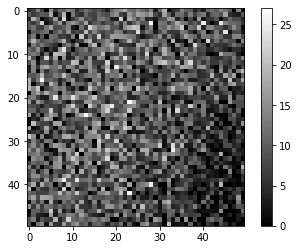

In [3]:
subimage = img[0:50,0:50,2]
print('Images are just numerical arrays')
print('Image dimension: ', subimage.shape)
print('Data type : ', subimage.dtype) # check the data type
plt.imshow(subimage, cmap='gray')
plt.colorbar();

Let's create an image with random (integers) intensity values between 0 and 255 (8 bit-depth)

A image is just a numerical array: 
 [[ 18  25  80   1 164 167 239 106 242   5]
 [218 195  73 221  93 116  78 154  15  41]
 [197  80  22 173  24 171 251 200  53  12]
 [ 88 148 139 123  35  25 114 206  58 195]
 [160 213  15  36  31 103  93 151  93  52]
 [225 108 134 172 169 153 132 153 114 192]
 [210  96 189  36  35  38 241 195 218 179]
 [ 47  58 178 111 115 168 248 124 252  50]
 [124 163  24  64 181 131 142  56 112 101]
 [205  63  61 231 238 128  18 157 120 114]]
The image is an :  <class 'numpy.ndarray'>
Data type :  uint8
Image with Random intensity values


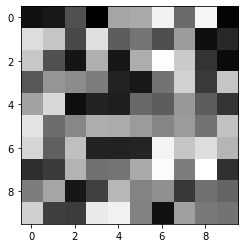

In [4]:
img2=np.random.randint(0,255,[10,10]) # create random array of 
print('A image is just a numerical array: \n', img2)
np.savetxt('randimg.txt', img2) # save as text file

dataimg = np.loadtxt("randimg.txt", dtype='uint8')   # load txt file and a numpy array with data type uint8
print('The image is an : ', type(dataimg)) # check imported data is a numpy array
print('Data type : ',dataimg.dtype) # check the data type
plt.imshow(dataimg, interpolation="none", cmap='gray') # visualise as image, interpolation=none shows actual pixels, cmap is the choice of color map
print('Image with Random intensity values')
plt.show()

#### Variable type

Python's and Numpy's standard data types include:

In [5]:
# numeric (int, float, complex, boolean), 
b1 = 5.1 # float
b2 = 5 # int
b3 = 1<2 # boolean
print(b1, ' is',type(b1), '\n')
print(b2, ' is',type(b2), '\n')
print(b3, ' is',type(b3), '\n')

# lists 
c = ['karin', 'sasaki', 345.453]
print(c, ' is', type(c), '\n')

# strings 
print(c[0], ' is',type(c[0]), '\n')

# tuples
d = (123, 'john')
print(d, ' is', type(d), '\n')

# dictionaries
e = {'name': 'marcie','code':63214, 'dept': 'mathematics'}
print(e, ' is', type(e), '\n')

# Numpy array
f = np.array([1,2,3,4,5])
print(f, ' is', type(f), '\n')

# note this is different form the list
h = [1,2,3,4,5]
print(h, ' is', type(h), '\n')

5.1  is <class 'float'> 

5  is <class 'int'> 

True  is <class 'bool'> 

['karin', 'sasaki', 345.453]  is <class 'list'> 

karin  is <class 'str'> 

(123, 'john')  is <class 'tuple'> 

{'name': 'marcie', 'code': 63214, 'dept': 'mathematics'}  is <class 'dict'> 

[1 2 3 4 5]  is <class 'numpy.ndarray'> 

[1, 2, 3, 4, 5]  is <class 'list'> 



## 2. Image Brightness and Bit Depth


The brightness (or luminous brightness) of a digital image is a measure of relative intensity values across the pixel array after the image.



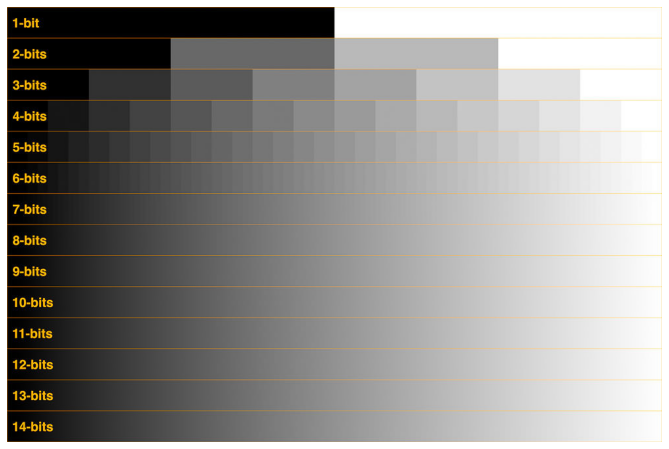

In [6]:
imgBitDepth = io.imread('graylevels.jpg')    
plt.figure(figsize=(16,8))
plt.imshow(imgBitDepth)  
plt.axis('off')
plt.show;

Check an image with different gray levels

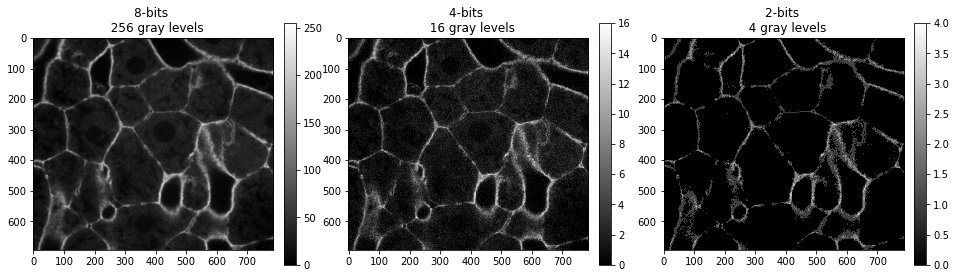

In [7]:
img8bit= img[:,:,1]

def convert(img, target_type_min, target_type_max, target_type):
    imin = img.min()
    imax = img.max()

    a = (target_type_max - target_type_min) / (imax - imin)
    b = target_type_max - a * imax
    new_img = (a * img + b).astype(target_type)
    return new_img


plt.figure(figsize=(16,8))

plt.subplot(1,3,1)
plt.title('8-bits \n  256 gray levels')  
plt.imshow(img8bit, cmap='gray')
plt.colorbar(fraction=0.046, pad=0.04)

img4bit = convert(img8bit, 0, 16, np.uint8)
plt.subplot(1,3,2)
plt.title('4-bits \n  16 gray levels')  
plt.imshow(img4bit, interpolation="none", cmap='gray')
plt.colorbar(fraction=0.046, pad=0.04)

img2bit = convert(img8bit, 0, 4, np.uint8)
plt.subplot(1,3,3)
plt.title('2-bits \n  4 gray levels')  
plt.imshow(img2bit, interpolation="none", cmap='gray')
plt.colorbar(fraction=0.046, pad=0.04)           
plt.show()

Same for an small inset

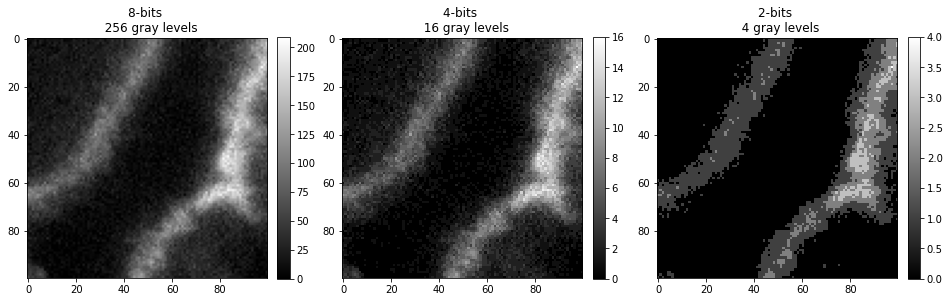

In [8]:
img8bit= img[0:100,0:100,1]

def convert(img, target_type_min, target_type_max, target_type):
    imin = img.min()
    imax = img.max()

    a = (target_type_max - target_type_min) / (imax - imin)
    b = target_type_max - a * imax
    new_img = (a * img + b).astype(target_type)
    return new_img


plt.figure(figsize=(16,8))

plt.subplot(1,3,1)
plt.title('8-bits \n  256 gray levels')  
plt.imshow(img8bit, cmap='gray')
plt.colorbar(fraction=0.046, pad=0.04)

#img4bit=img8bit/16
img4bit = convert(img8bit, 0, 16, np.uint8)
plt.subplot(1,3,2)
plt.title('4-bits \n  16 gray levels')  
plt.imshow(img4bit, interpolation="none", cmap='gray')
plt.colorbar(fraction=0.046, pad=0.04)

    
img2bit = convert(img8bit, 0, 4, np.uint8)
plt.subplot(1,3,3)
plt.title('2-bits \n  4 gray levels')  
plt.imshow(img2bit, interpolation="none", cmap='gray')
plt.colorbar(fraction=0.046, pad=0.04)           
plt.show()

#### Color maps and look up tables (LUT)

- Lookup tables do the mapping from a numeric pixel value to a color. 
- This is the main mechanism how we visualise microscopy image data. 

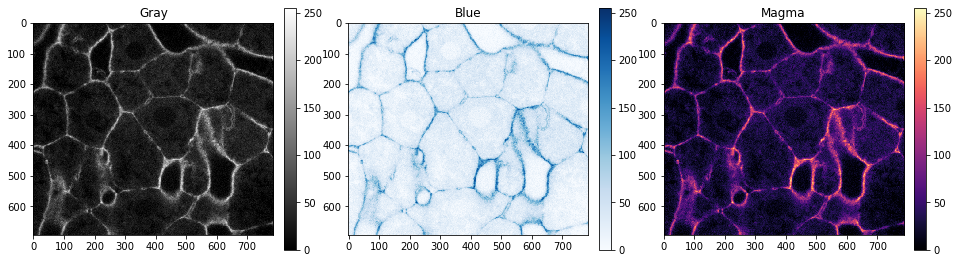

In [9]:
# visualise with different color map

plt.figure(figsize=(16,8))

plt.subplot(1,3,1)
plt.title('Gray')  
plt.imshow(img[:,:,1],interpolation='none',cmap='gray')  # the color map is gray     
plt.colorbar(fraction=0.046, pad=0.04)           
plt.subplot(1,3,2)
plt.title('Blue')
plt.imshow(img[:,:,1],interpolation='none',cmap='Blues') # the color map is blues
plt.colorbar(fraction=0.046, pad=0.04)           
plt.subplot(1,3,3)
plt.title('Magma')
plt.imshow(img[:,:,1],interpolation='none',cmap='magma') # the color map is blues
plt.colorbar(fraction=0.046, pad=0.04)           
plt.show()


## 3. Image arithmetic and unexpected errors

#### Adding an integer valua to an 8-bits image

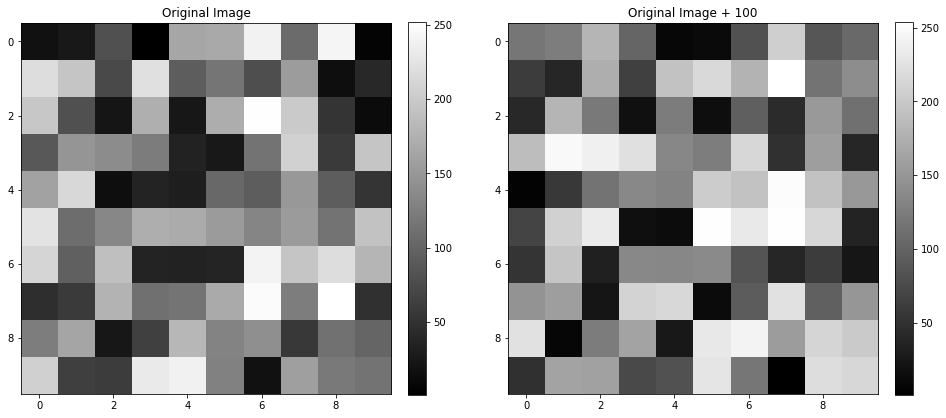

Values are calculated modulo 256


Arithmetics which loops around is called modulo arithmetic


[[ 18  25  80   1 164 167 239 106 242   5]
 [218 195  73 221  93 116  78 154  15  41]
 [197  80  22 173  24 171 251 200  53  12]
 [ 88 148 139 123  35  25 114 206  58 195]
 [160 213  15  36  31 103  93 151  93  52]
 [225 108 134 172 169 153 132 153 114 192]
 [210  96 189  36  35  38 241 195 218 179]
 [ 47  58 178 111 115 168 248 124 252  50]
 [124 163  24  64 181 131 142  56 112 101]
 [205  63  61 231 238 128  18 157 120 114]]


[[118 125 180 101   8  11  83 206  86 105]
 [ 62  39 173  65 193 216 178 254 115 141]
 [ 41 180 122  17 124  15  95  44 153 112]
 [188 248 239 223 135 125 214  50 158  39]
 [  4  57 115 136 131 203 193 251 193 152]
 [ 69 208 234  16  13 253 232 253 214  36]
 [ 54 196  33 136 135 138  85  39  62  23]
 [147 158  22 211 215  12  92 224  96 150]
 [224   7 124 164  25 231 242 156 212 201]
 [ 49 163 161  75  82 228 118   1 220 214]]




In [10]:
# Add integer value to an image

dataimgAdd = dataimg+100

# show results
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(dataimg,cmap="gray", interpolation='None')
plt.colorbar(fraction=0.046, pad=0.04) 

plt.subplot(1,2,2)
plt.title('Original Image + 100')
data_plot = plt.imshow(dataimgAdd,cmap="gray", interpolation='None')
plt.colorbar(fraction=0.046, pad=0.04) 
plt.show()


print('Values are calculated modulo 256')
print('\n')
print('Arithmetics which loops around is called modulo arithmetic')
print('\n')

print(dataimg)
print('\n')
print(dataimgAdd)
print('\n')


## 4. Getting some simple statistics

Let's calculate some simple statistics from the image intensities

#### Import and vizualize the image

In [11]:
img = io.imread('2D_image_nuclei_cells_liver.tif')        # import image
print('Image dimension: ', img.shape)
print('Number of Channels: ', img.shape[2])
print('Image type: ', img.dtype)
ChannelNames = ["Endosomes", "Membranes", "Nuclei"]  # list with channels' names



Image dimension:  (694, 786, 3)
Number of Channels:  3
Image type:  uint8


In [12]:
# plot the image channels using a defined function

def myplt(img, title):
    """This function displays the input image with interpolation='none' and cmap='magma'. """
    plt.imshow(img,interpolation='none',cmap='magma')
    plt.colorbar(fraction=0.046, pad=0.04) 
    plt.title(title)

    

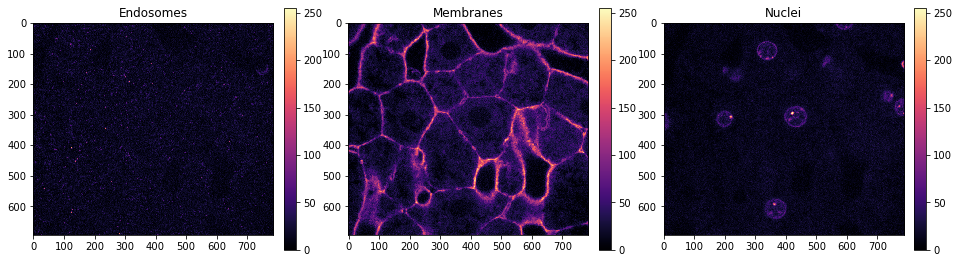

In [13]:
plt.figure(figsize=(16,8))
ch = 0
while ch < img.shape[-1]:   
    plt.subplot(1,3,ch+1)
    myplt(img[:,:,ch], ChannelNames[ch])
    ch = ch +1   
    

In [14]:
# Get each channel and get mean intensity values
Endosomes = img[:,:,0]
Membranes = img[:,:,1]
Nuclei = img[:,:,2]

mean_Endosomes = np.mean(Endosomes)   
mean_Membranes = np.mean(Membranes)   
mean_Nuclei = np.mean(Nuclei)   

std_Endosomes = np.std(Endosomes)   
std_Membranes = np.std(Membranes)   
std_Nuclei = np.std(Nuclei)   


In [15]:
# store results  in a dictionary      
results = {'Structure':[], 'Mean intensity':[], 'Std intensity':[]}        
results['Structure'] = ChannelNames
results['Mean intensity'] = [mean_Endosomes, mean_Membranes, mean_Nuclei]
results['Std intensity'] = [std_Endosomes, std_Membranes, std_Nuclei]

print(results)

{'Structure': ['Endosomes', 'Membranes', 'Nuclei'], 'Mean intensity': [14.844616890687902, 37.03784528968769, 13.794960072156103], 'Std intensity': [9.220924008932009, 31.88791340538846, 9.928484912170934]}


In [16]:
# save quantitative data to json file
import json
json.dump(results, open("results.txt", 'w'))